<a href="https://colab.research.google.com/github/ketanarora004/black-scholes-model/blob/main/Black_scholes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BLACK-SCHOLES MODEL**
[Black-Scholes model basics](https://www.investopedia.com/terms/b/blackscholes.asp)

**IMPORTING THE LIBRARIES**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import date

import warnings
warnings.filterwarnings("ignore")

# to fetch data
import yfinance as yf

import scipy.stats as ss

**IMPORTING DATA**

In [ ]:
symbol = '^SPX'
end = date.today()
start = end.replace(year = 2022)

tickerData = yf.Ticker(symbol)

# Read data
df = tickerData.history(period='1d', start=start, end=end, interval = '1d')


df.tail()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-04-01 00:00:00-04:00,5257.970215,5263.950195,5229.200195,5243.770020,3325930000,0.0,0.0
2024-04-02 00:00:00-04:00,5204.290039,5208.339844,5184.049805,5205.810059,3886590000,0.0,0.0
2024-04-03 00:00:00-04:00,5194.370117,5228.750000,5194.370117,5211.490234,3703250000,0.0,0.0
2024-04-04 00:00:00-04:00,5244.049805,5256.589844,5146.060059,5147.209961,4075680000,0.0,0.0
2024-04-05 00:00:00-04:00,5158.950195,5222.180176,5157.209961,5204.339844,3386780000,0.0,0.0


In [ ]:
symbol = '^SPX'  #the ticker of the stock whose data is to be taken out
dfo = yf.Ticker(symbol)

In [ ]:
dfo.options  #to get the date of different expiration time

('2024-04-08',
 '2024-04-09',
 '2024-04-10',
 '2024-04-11',
 '2024-04-12',
 '2024-04-15',
 '2024-04-16',
 '2024-04-17',
 '2024-04-18',
 '2024-04-19',
 '2024-04-22',
 '2024-04-23',
 '2024-04-24',
 '2024-04-25',
 '2024-04-26',
 '2024-04-29',
 '2024-04-30',
 '2024-05-01',
 '2024-05-02',
 '2024-05-03',
 '2024-05-06',
 '2024-05-07',
 '2024-05-08',
 '2024-05-09',
 '2024-05-10',
 '2024-05-13',
 '2024-05-17',
 '2024-05-24',
 '2024-05-31',
 '2024-06-21',
 '2024-06-28',
 '2024-07-19',
 '2024-07-31',
 '2024-08-16',
 '2024-08-30',
 '2024-09-20',
 '2024-09-30',
 '2024-10-18',
 '2024-11-15',
 '2024-12-20',
 '2024-12-31',
 '2025-01-17',
 '2025-02-21',
 '2025-03-21',
 '2025-03-31',
 '2025-04-17',
 '2025-06-20',
 '2025-12-19',
 '2026-03-20',
 '2026-12-18',
 '2027-12-17',
 '2028-12-15',
 '2029-12-21')

In [ ]:
dfo_exp = dfo.option_chain(dfo.options[1])  #you can change index to try on different expiry dates

In [ ]:
dfo_exp.calls.head() #data for call options

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW240409C04000000,2024-03-26 17:09:49+00:00,4000.0,1236.24,1198.7,1213.2,0.0,0.0,1.0,1,1.234867,True,REGULAR,USD
1,SPXW240409C04350000,2024-04-03 20:06:20+00:00,4350.0,871.12,848.8,863.4,0.0,0.0,1.0,1,0.889894,True,REGULAR,USD
2,SPXW240409C04625000,2024-04-02 14:58:38+00:00,4625.0,567.46,574.0,588.6,0.0,0.0,NaN,1,0.628483,True,REGULAR,USD
3,SPXW240409C04650000,2024-04-04 17:51:49+00:00,4650.0,594.82,549.0,563.6,0.0,0.0,6.0,6,0.603764,True,REGULAR,USD
4,SPXW240409C04675000,2024-04-01 14:54:45+00:00,4675.0,571.51,524.1,538.6,0.0,0.0,NaN,1,0.581303,True,REGULAR,USD


# **CALCULATION OF ANNUAL VOLATALITY**
Annual volatility of the stock can be calculated as:

Calculating daily logarithmic returns

Then calculating its standard deviation to get daily volatility

Then multiplying it by sqrt(252) as there are 252 trading days in a year.

In [ ]:
def annual_vol(df):
    """
    Function to calculate annual volatility

    Parameters
    ----------
    df : dataframe
         Stock info

    Returns
    -------
    vol : float
        annual volatility of the stock
    """


    log_return = np.log(1+df.Close.pct_change())
    log_return = log_return.dropna()
    daily_vol = log_return.std()
    vol = daily_vol*(np.sqrt(252))

    return vol

In [ ]:
vol = annual_vol(df)
vol

0.18403811328232036

# **BLACK-SCHOLES MODEL**


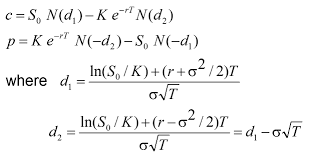

C : call option price

P : Put option price

S : Stock price

K : Strike price

r : risk free rate

t : time of maturity in year

N = Normal distribution

In [ ]:
from scipy.stats import norm

def euro_vanilla(S, K, T, r, sigma, option='call'):
  """
  To calculate options price with the help of Black-Scholes model

  Parameters
  ----------
  S : float
      The price of the underlying asset
  K : float
      Strike price of the option
  T : float
      Time to expiry in years
  r : float
      Risk-free rate (e.g., annualized interest rate)
  sigma : float
      Annualized volatility of the underlying asset
  option : string, optional
      Option type: 'call' (default) or 'put'

  Returns
  -------
  float
      The price (premium) of the call or put option
  """

  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
  d2 = d1 - sigma * np.sqrt(T)

  if option == 'call':
        premium = S * ss.norm.cdf(d1) - K * np.exp(-r * T) * ss.norm.cdf(d2)
  elif option == 'put':
        premium = K * np.exp(-r * T) * ss.norm.cdf(-d2) - S * ss.norm.cdf(-d1)
  else:
        raise ValueError("Invalid option type. Use 'call' or 'put'.")

  return premium

In [ ]:
#Calculate the number of days left for expiry from your calculation in years
N = 100
T = 8.0/365
t = T/N


In [ ]:
#r is the risk free rate taken from the 10 years us treasury bond
#call price calculated from black scholes model
call = {}
for K in dfo_exp.calls['strike']:
    call_price = euro_vanilla(S = df['Close'][len(df)-1], K = K, T = T, r=0.0123*t, sigma=vol)
  # print(call_price)
    call[K] = call_price
th_call = pd.DataFrame.from_dict(call, orient='index')
th_call.rename(columns = {0:"th_call"}, inplace = True)
th_call.head()

,th_call
4000.0,1204.340080
4350.0,854.340101
4625.0,579.340326
4650.0,554.340644
4675.0,529.341388


In [ ]:
#actual call price
ac_call = dfo_exp.calls.loc[:, ['strike', 'lastPrice']]
ac_call.set_index('strike', inplace = True)
ac_call.rename(columns = {"lastPrice":"ac_call"}, inplace=True)
ac_call.head()

,ac_call
strike,
4000.0,1236.24
4350.0,871.12
4625.0,567.46
4650.0,594.82
4675.0,571.51


In [ ]:
call = th_call
call["ac_call"] = ac_call
call.head(10)

,th_call,ac_call
4000.0,1204.340080,1236.24
4350.0,854.340101,871.12
4625.0,579.340326,567.46
4650.0,554.340644,594.82
4675.0,529.341388,571.51
4700.0,504.343063,485.75
4725.0,479.346686,480.93
4750.0,454.354219,456.17
4800.0,404.398289,328.31
4810.0,394.416027,388.46


<Axes: >

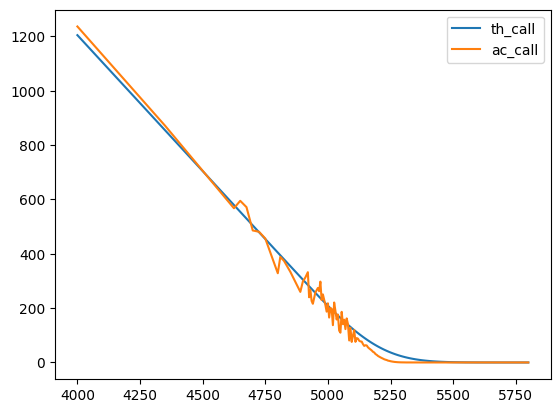

In [ ]:
call.plot() #plotting the actual and theoretical call prices

In [ ]:
#r is the risk free rate taken from the 10 years us treasury bond
#theoretical put price calculated from black scholes model
put = {}
for K in dfo_exp.puts['strike']:
    put_price = euro_vanilla(S = df['Close'][len(df)-1], K = K, T = T, r=0.0424, sigma=vol, option = 'put')
  # print(put_price)
    put[K] = put_price
th_put = pd.DataFrame.from_dict(put, orient='index')
th_put.rename(columns = {0:"th_put"}, inplace = True)
th_put.head()

,th_put
2200.0,1.710726e-219
2600.0,3.409994e-143
2800.0,1.470630e-114
3000.0,8.888451e-91
3200.0,4.852714e-71


In [ ]:
#actual put price
ac_put = dfo_exp.puts.loc[:, ['strike', 'lastPrice']]
ac_put.set_index('strike', inplace = True)
ac_put.rename(columns = {"lastPrice":"ac_put"}, inplace=True)
ac_put.tail()

,ac_put
strike,
5350.0,121.75
5380.0,172.91
5400.0,198.98
5500.0,278.07
5550.0,325.61


In [ ]:
put = th_put
put["ac_put"] = ac_put
put.tail(10)

,th_put,ac_put
5320.0,128.789819,76.79
5325.0,132.731868,169.00
5330.0,136.722956,142.71
5335.0,140.761643,95.80
5340.0,144.846479,86.70
5350.0,153.148760,121.75
5380.0,179.011629,172.91
5400.0,196.936343,198.98
5500.0,291.808736,278.07
5550.0,341.001248,325.61


<Axes: >

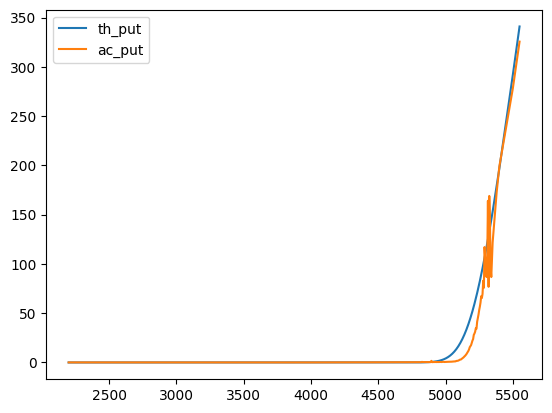

In [ ]:
put.plot()